<a href="https://colab.research.google.com/github/DLesmes/Dlesmes.github.io/blob/master/PruebaTecnicaAntivirus_Rta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Prueba técnica: Análisis de mercado mobiliario


**Desarrollado por Diego Lesmes**

# 1. Prensado como un Data Science

¿Qué datos crees que te ayudarían a trabajar en el problema? ¿Por qué?

#Respuesta

Dentro de los diferentes atributos o características que podrían ser útiles para determinar el valor de una propiedad, se pueden tener en cuenta características como:

*   Tipo de propiedad: Residencial, comercial, apartamento entre otros
*   Área: Tamaño del predio que ocupa la propiedad
*   Área cubierta: Área Total sin tener en cuenta área al expuesta al aire libre
*   Ubicación: datos de latitud y longitud, para deerminar la ubicación del predio, de aca podemos obtener otros datos como:
  *   Departamento
  *   Ciudad
  *   Barrio
*   Diseño arquitectónico: tipo Arquitectonico de la propiedad
*   Año de construcción: Esta fecha nos podra indicar la antiguedad de la propiedad
*   '# de balcones: La cantidad de balcones con los que cuenta la propiedad
*   '# de habitaciones: La cantidad de cuartos con la que cuenta la propiedad
*   '# de baños: La cantidad de baños con la que cuenta la propiedad
*   Precio Comercial: El precio al cual esta valuada la propiedad
*   Precio catastral: El precio usado para causar impuestos
*   Precio de venta: El precio de venta de la propiedad
*   Precio por metro cuadrado: El valor por unidad de área d ela propiedad, es un predictor muy preciso al momento de realizar la valuación
*   Fecha de la venta: Si la propiedad fue vendida anteriormente de esta manera se podría aplicarle el efecto de la infliación a los precios para hacerlos comparables
*   Paqueadero: Si la propiedad cuenta con parqueadero
*   Garaje: Si cuenta con un salón de garaje   
*   Unidades residenciales: Si la propiedad cuenta con varios apartamentos
*   Piso: si se trata de una unidad residencial en que piso se encuentra

En general esta información podría ser muy util para poder realizar un modelo predictivo que determine el valor de la propiedad, debido a que estas características inciden principalmente a la hora de realizar la venta de las propiedades, sin embargo el modelo esta en función del procedimiento que se realice en la información disponible y el análisis estadístico pertinente.


# 2. Análisis Exploratorio de Datos

### Importamos el data set

In [12]:
from google.colab import files
data_to_load = files.upload()

Saving DS_Proyecto_01_Datos_Properati.csv to DS_Proyecto_01_Datos_Properati (1).csv


In [8]:
import io
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import pandas.util.testing as tm
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
def RMSE(prediction,true_values):  # Root Mean Squared Error
    return np.sqrt(np.mean(np.square(prediction-true_values)))
def MAE(prediction,true_values): #Mean Absolute Error
    return np.mean(np.abs(prediction-true_values))
def MAPE(prediction,true_value): #Mean Absolute Error Percenage
    return np.mean(np.abs((prediction-true_value)/true_value)*100)

In [9]:
df = pd.read_csv(io.BytesIO(data_to_load['DS_Proyecto_01_Datos_Properati.csv']))
df.head()

NameError: ignored

In [14]:
len(list(df.columns))

19

In [ ]:
df.shape

(146660, 19)

In [ ]:
df.columns

Index(['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2', 'l3',
       'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
       'price', 'currency', 'title', 'description', 'property_type',
       'operation_type'],
      dtype='object')

In [15]:
features = pd.DataFrame(df.dtypes)
features.columns = ['type']
features_f = features[features['type'] == 'float64'].index
features_o = features[features['type'] == 'object'].index
features.sort_values('type')

,type
bedrooms,float64
lat,float64
lon,float64
price,float64
surface_covered,float64
rooms,float64
surface_total,float64
bathrooms,float64
description,object
title,object


**Observación:** Las variables que debería ser tipo fecha estan siendo leidas como texto

### Se verifican los regisros nulos

In [ ]:
df.isnull().sum()

start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64

### Se analizan las variables categoricas y numéricas

In [16]:
df.describe(include='object')

,start_date,end_date,created_on,l1,l2,l3,currency,title,description,property_type,operation_type
count,146660,146660,146660,146660,146660,146660,146660,146660,146660,146660,146660
unique,366,412,366,1,4,89,1,77733,106668,10,1
top,2019-07-31,9999-12-31,2019-07-31,Argentina,Capital Federal,Palermo,USD,DEPARTAMENTO EN VENTA,EDIFICIO DE CATEGORIA CON MATERIALES Y ACCESOR...,Departamento,Venta
freq,11022,25101,11022,146660,92539,13073,146660,5064,235,107326,146660


**Observación:** Las variables *l1*, *currency* y *operation_type* solo tienen una categoría, por lo que no son útiles en el estudio. Las variables de fecha parecen ser un registro por cada día del año

In [ ]:
df_cleaned['property_type'].value_counts()

Departamento     1520
Casa              625
PH                355
Lote                3
Casa de campo       2
Otro                2
Oficina             2
Cochera             1
Name: property_type, dtype: int64

**Observación:** Solo tres categorías de la variable "*Property type*" tienen una cantidad importantes de registros  

In [ ]:
round(df.describe(include='float64'),2)

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,136735.00,136701.00,146660.00,146660.00,140703.00,126133.00,125046.00,146660.00
mean,-34.60,-58.47,3.08,1.98,1.60,216.87,112.82,241221.08
std,0.47,0.49,1.42,1.15,0.89,2037.61,916.86,318519.46
min,-35.32,-180.00,1.00,0.00,1.00,10.00,1.00,5500.00
25%,-34.63,-58.50,2.00,1.00,1.00,52.00,47.00,111000.00
50%,-34.60,-58.44,3.00,2.00,1.00,78.00,68.00,166000.00
75%,-34.57,-58.41,4.00,3.00,2.00,140.00,108.00,265000.00
max,85.05,-57.81,35.00,15.00,14.00,193549.00,126062.00,32434232.00


**Observación:** Se evidencia la presencia de outliers y la dimensión de las variables, lo que sugiere la necesidad de algun tratamiento inicial a la data

In [ ]:
df_cleaned['l1'].unique()

array(['Argentina'], dtype=object)

**Observación:** Hay varios registros cuya ubicación no corresponde a Argentina

### Se analiza gráficamente la distribución de las variables numéricas

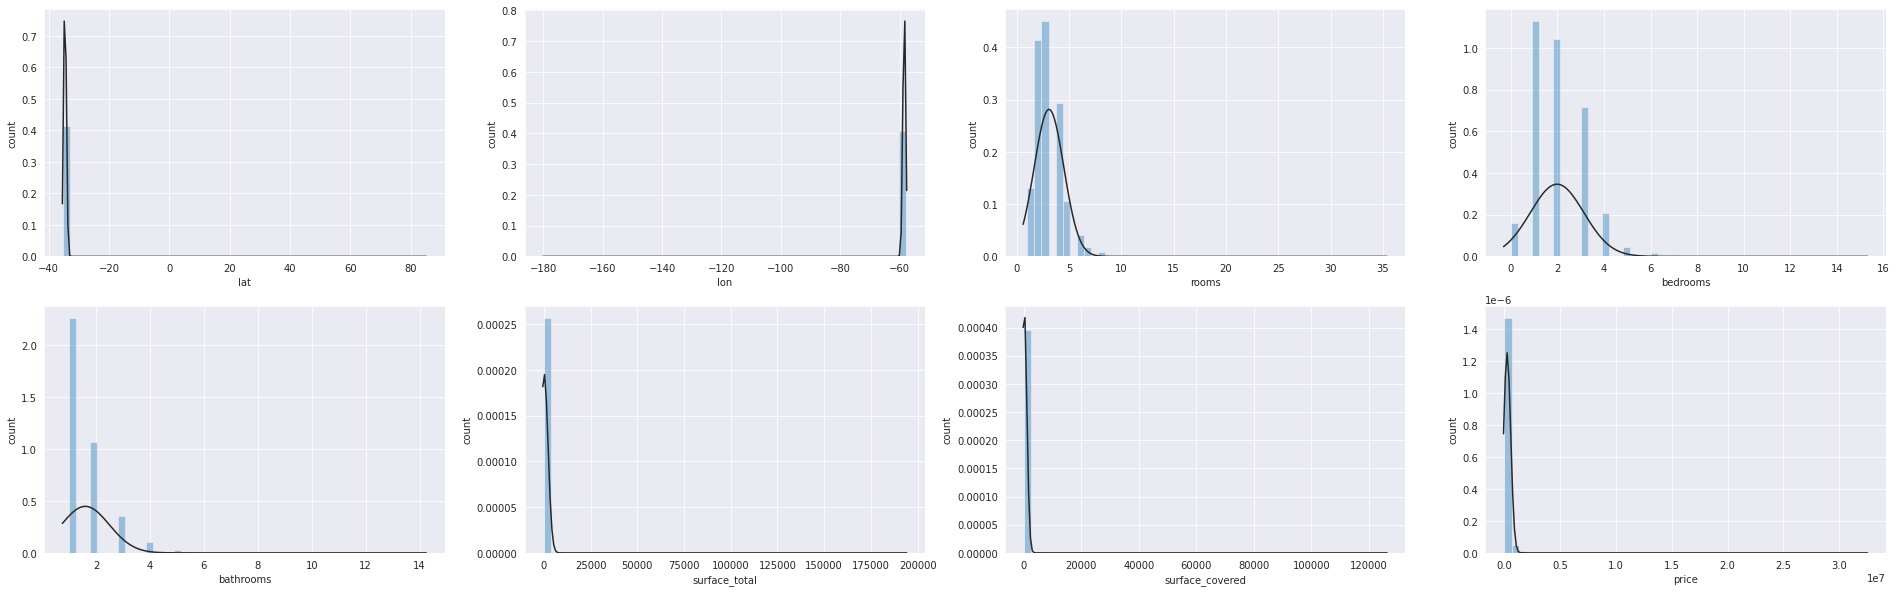

In [17]:
var_hist = features_f
plt.figure(figsize=(33,10))
for i,var in enumerate(var_hist):
    plt.subplot(2,len(features_f)/2,i+1)
    sns.distplot(df[var],fit=stats.norm, kde=False)
    plt.xlabel(var)
    plt.ylabel("count")

**Observación:** Se evidencia la presencia de outliers y el orden de magnitud de la variables. Lo que evita ver la distribución normal de las mismas

### Validación inicial de las variables numéricas y transformación

In [6]:
clean = np.where(
    (df["lat"] < -21) & # norte
    (df["lat"] > -67) & # sur
    (df["lon"] > -73) & # este
    (df["lon"] < -53)  & # oeste
    (df["price"] > 0)  &
    (df["surface_total"] > 0)  &
    (df["surface_covered"] > 0) &
    #(pd.to_numeric(df["end_date"]) < pd.to_numeric(pd.Timestamp.now())) &
    (df["bathrooms"] > 0) #&
    )
df_cleaned = df.iloc[clean].copy()
df_cleaned['start_date_P'] = pd.DatetimeIndex(df_cleaned["start_date"]).month #pd.to_datetime(df_cleaned["start_date"]).dt.to_period("M")
#df_cleaned['end_date_P'] = pd.to_datetime(pd.Timestamp.date(pd.to_datetime(df_cleaned["end_date"]))).dt.to_period("M")
df_cleaned['created_on_P'] = pd.DatetimeIndex(df_cleaned["start_date"]).month #pd.to_datetime(df_cleaned["created_on"]).dt.to_period("M")
df_cleaned = df_cleaned[df_cleaned.property_type.isin(["Departamento", "Casa", "PH"])]

NameError: ignored

**Observación:** Se aplican las observaciones identificadas previamente, para realizar la validación inicial de los datos.

###BoxCox Test

In [ ]:
features_numeric = ['rooms',	'bathrooms',	'surface_total',	'surface_covered',	'price']
BC_matrix = []
for var in features_numeric:
  BC_matrix.append(stats.boxcox(abs(df_cleaned[var])))
BC_matrix = pd.DataFrame(BC_matrix)
BC_matrix.index = features_numeric
BC_matrix.columns = ['Parametros', 'Lambda']
round(BC_matrix['Lambda'].head(5),2)

rooms              0.22
bathrooms         -1.70
surface_total     -0.52
surface_covered   -0.31
price             -0.30
Name: Lambda, dtype: float64

**Observación:** Los valores de lambda negativos para una función BoxCox, recomiendan realizar una transformación logaritmica de las variables numéricas.

In [124]:
df_cleaned['log_Price'] = np.log(df_cleaned['price'])
df_cleaned['log_Price_per_S_total'] = np.log(df_cleaned['price']/df_cleaned["surface_total"])
df_cleaned['log_Price_per_S_covered'] = np.log(df_cleaned['price']/df_cleaned["surface_covered"])
df_cleaned['log_S_total'] = np.log(df_cleaned["surface_total"])
df_cleaned['log_S_covered'] = np.log(df_cleaned["surface_covered"])

**Observación:** Se realiza la transformación de las variables mas relevantes. Adicionalmente se crean intuitivamente las variables *log_Prices_per_S_covered* y *log_Prices_per_S_total*, para analizar los precios por magnitud de área, posteriormente se validara la utilidad de la misma

In [125]:
df_cleaned.shape

(113763, 26)

In [126]:
'Observación: Después de aplicar la validación, se observa una reducción del {0}% de la cantidad de información'.format(round(len(df_cleaned)/len(df)-1,4)*100)

'Observación: Después de aplicar la validación, se observa una reducción del -22.43% de la cantidad de información'

In [127]:
features = pd.DataFrame(df_cleaned.dtypes)
features.columns = ['type']
features_f = features[features['type'] == 'float64'].index
features_o = features[features['type'] == 'object'].index
features.shape
#features

(26, 1)

### Se analizan nuevamente las variables numéricas

In [128]:
round(df_cleaned.describe(include='float64'),2)

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,log_Price,log_Price_per_S_total,log_Price_per_S_covered,log_S_total,log_S_covered
count,113763.00,113763.00,113763.00,113763.00,113763.00,113763.00,113763.00,113763.00,113763.00,113763.00,113763.00,113763.00,113763.00
mean,-34.60,-58.46,3.13,2.07,1.57,181.28,111.35,238466.60,12.10,7.58,7.79,4.52,4.31
std,0.10,0.14,1.39,1.08,0.86,1423.32,906.42,295089.76,0.67,0.72,0.53,0.82,0.64
min,-35.15,-59.04,1.00,0.00,1.00,10.00,1.00,6000.00,8.70,-0.59,0.29,2.30,0.00
25%,-34.62,-58.50,2.00,1.00,1.00,52.00,46.00,115000.00,11.65,7.40,7.55,3.95,3.83
50%,-34.60,-58.44,3.00,2.00,1.00,78.00,67.00,168000.00,12.03,7.74,7.87,4.36,4.20
75%,-34.57,-58.41,4.00,3.00,2.00,136.00,107.00,263375.00,12.48,7.99,8.10,4.91,4.67
max,-34.17,-57.81,35.00,15.00,14.00,169000.00,126062.00,32434232.00,17.29,13.53,13.53,12.04,11.74


**Observación:** La transformación y validación inicial hacen sentido, pues promedio y la desviación estandar se ajusta con los cuantiles de cada variable nueva

In [129]:
round(df_cleaned.describe(include='int64'))
#df_cleaned.describe(include='object')

,start_date_P,created_on_P
count,113763.0,113763.0
mean,6.0,6.0
std,3.0,3.0
min,1.0,1.0
25%,3.0,3.0
50%,6.0,6.0
75%,9.0,9.0
max,12.0,12.0


**Observación:** Se analiza las variables tipo entero, que son resultado de extraer el mes de las variables de fecha, dado que solo contemplan un periodo de 13 meses, si esta variable comprendiera un periodo mayor si seria interesante ver la variación en un intervalo mayor

### Se analiza de nuevo gráficamente la distribución de las variables numéricas, después de la validación y la transforacion de las variables.

In [130]:
var_hist = ['lat',	'lon',	'rooms',	'bedrooms',	'bathrooms',
            'log_Price',	'log_Price_per_S_total',	'log_Price_per_S_covered',	'log_S_total',	'log_S_covered','start_date_P','created_on_P']
len(var_hist)

12

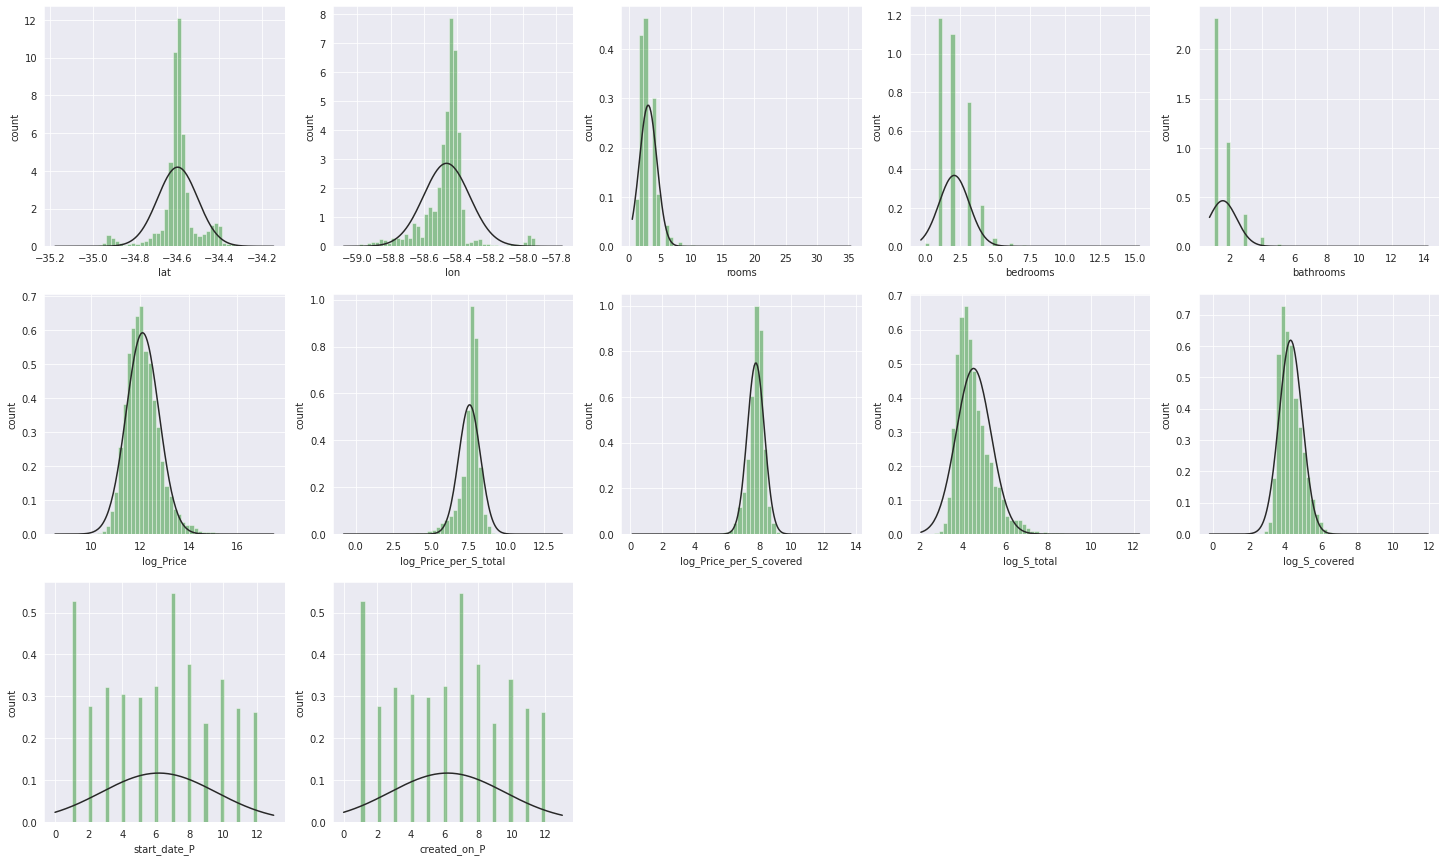

In [131]:
plt.figure(figsize=(25,15))
for i,var in enumerate(var_hist):
    plt.subplot(3,5,i+1)
    sns.distplot(df_cleaned[var],fit=stats.norm, kde=False, color='g')
    plt.xlabel(var)
    plt.ylabel("count")

**Observación:** Se puede observar que la mayoría de las variables se distribuyen normal, solo tres variables tienen una disribución con cola derecha, la cual podría ser corregida, de ser necesario.

In [132]:
df_cleaned.isnull().sum()

start_date                 0
end_date                   0
created_on                 0
lat                        0
lon                        0
l1                         0
l2                         0
l3                         0
rooms                      0
bedrooms                   0
bathrooms                  0
surface_total              0
surface_covered            0
price                      0
currency                   0
title                      0
description                0
property_type              0
operation_type             0
start_date_P               0
created_on_P               0
log_Price                  0
log_Price_per_S_total      0
log_Price_per_S_covered    0
log_S_total                0
log_S_covered              0
dtype: int64

**Observación:** Ya no se tienen registros con valores nulos o faltantes

### Se definen las variables a utilizar finalmente para la continuación del análisis

In [149]:
covariables = ['start_date_P','created_on_P','l2', 'l3', 'property_type','rooms', 'bedrooms', 'bathrooms',
              'lat','lon','log_Price_per_S_total','log_Price_per_S_covered','log_S_total','log_S_covered','price','log_Price']
len(covariables)

16

### Distribución de las variables o predictores respecto a la variable dependiente

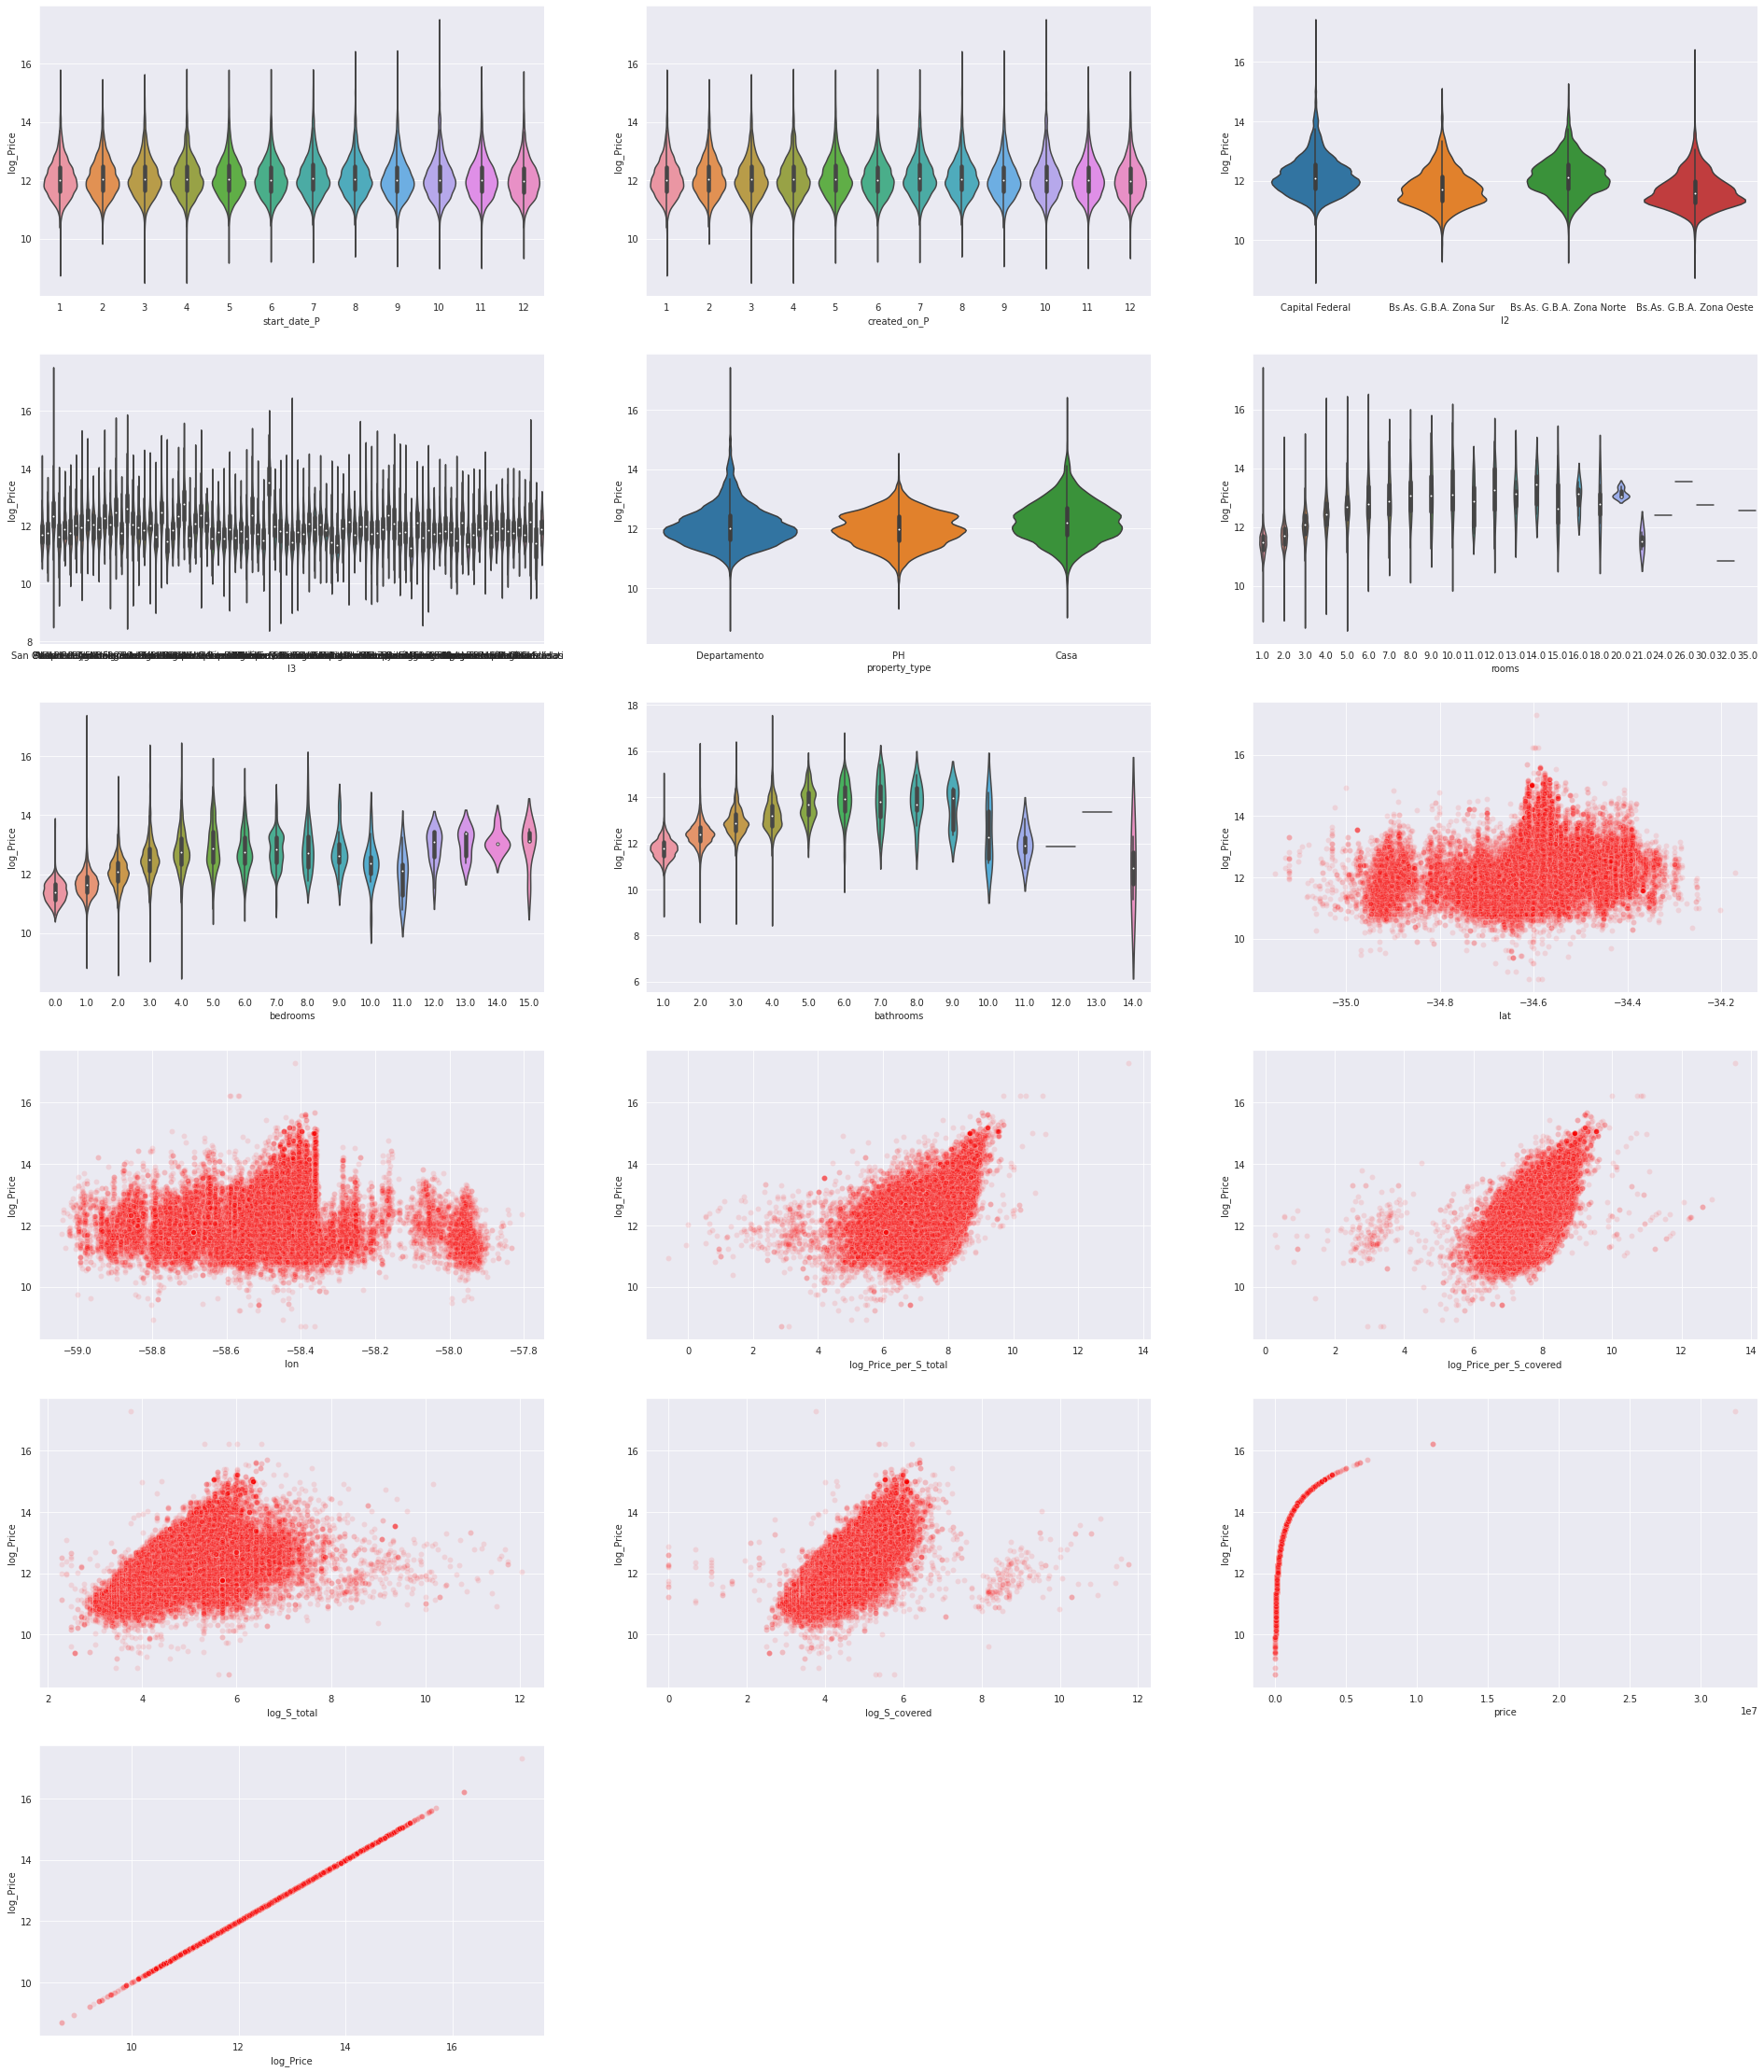

In [150]:
plt.figure(figsize=(33,40))
for i,var in enumerate(covariables):
    plt.subplot(6,3,i+1)
    if var in ['start_date_P','created_on_P','l2', 'l3','bathrooms','rooms','bedrooms','property_type']:
        sns.violinplot(x=var, y='log_Price', data=df_cleaned)
    else:
        sns.scatterplot(x=var,y='log_Price',data=df_cleaned, alpha=0.10,color='r')

**Observación:** A través de las gráficas de violines, se puede ver la distribuición de las variables categoricas con respecto a la variable dependiente, si bien no se percibe alguna tendencia en ellas, en particular la variable *rooms* si muestra los outliers que tiene.
Por su parte los gráficos de dispersión permiten ver la distribución de las variables numéricas con respecto a la variable independiente, sin embargo no muestra un claro indicio de heterocedasticidad o tendencia.
Las últimas dos gráficas permiten visualizar la transformación realizada a la variable dependiente.

### Análisis de correlaciones

Text(0.5, 1.0, 'Correlations between predictors')

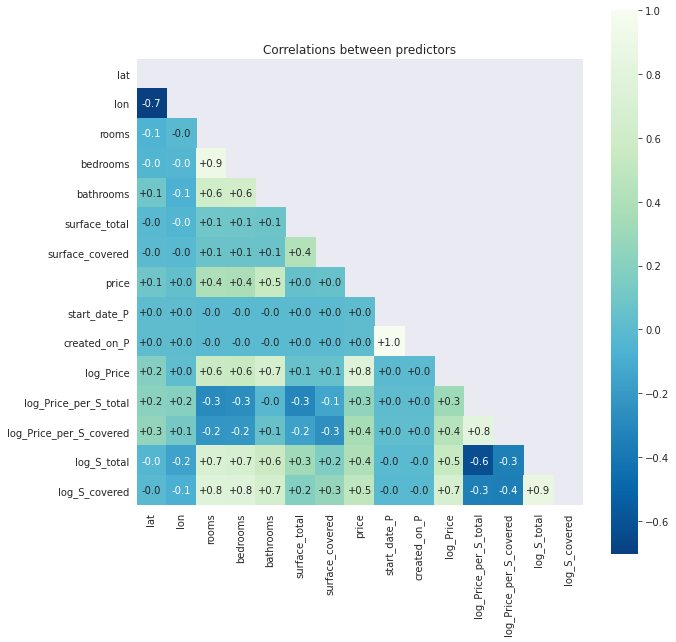

In [142]:
#compute correlation matrix
df_correlations = df_cleaned.corr()

#mask the upper half for visualization purposes
mask = np.zeros_like(df_correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Draw the heatmap with the mask and correct aspect ratio
plt.figure(figsize= (10,10))
sns.heatmap(df_correlations, mask=mask, cmap="GnBu_r",#"RdYlBu", 
    annot=True, square=True,
    #vmin=-0.9, vmax=0.9,
    fmt="+.1f")
plt.title("Correlations between predictors")

**Observación:** El analisis de correlaciones nos permite identifficar que variables numericas pueden representar una posible multicolinealidad en los modelos a realizar.

Las correlaciones mas fuertes se evidencian entre:


1.   Lat vs Lon
2.   Bedrooms vs Rooms
3.   start_date_p vs Created_on_p
4.   Log_Price vs batrooms
5.   Log_Price vs price
6.   Log_Price_per_S_covered vs Log_Price_per_S_total
7.   Log_S_total vs rooms
8.   Log_S_total vs bedrooms
9.   Log_S_total vs bathrooms
10.  Log_S_total vs Log_Price_per_S_total
11.  Log_S_covered vs rooms
12.  Log_S_covered vs bedrooms
13.  Log_S_covered vs bathrooms
13.  Log_S_covered vs Log_S_total

In [152]:
covariables

['start_date_P',
 'created_on_P',
 'l2',
 'l3',
 'property_type',
 'rooms',
 'bedrooms',
 'bathrooms',
 'lat',
 'lon',
 'log_Price_per_S_total',
 'log_Price_per_S_covered',
 'log_S_total',
 'log_S_covered',
 'price',
 'log_Price']

### Partición de la información

In [5]:
np.random.seed(1)
ndata = len(df_cleaned)
# Randomly choose 0.8n indices between 1 and n
idx_train = np.random.choice(range(ndata),int(0.5*ndata),replace=False)
# The test set is comprised from all the indices that were
# not selected in the training set:
idx_test  = np.asarray(list(set(range(ndata)) - set(idx_train)))
train     = df_cleaned.iloc[idx_train] # the training data set
test      = df_cleaned.iloc[idx_test]  # the test data set
print(train.shape) # 19,312 rows and 19 columns
print(test.shape)  #  4,829 rows and 19 columns

NameError: ignored

**Observación:** Se crean los conjuntos de prueba y entrenamiento

In [2]:
covariables = ['start_date_P',
          #'created_on_P',
          'l2',
          'l3',
          'property_type',
          'rooms',
          'bedrooms',
          'bathrooms',
          'lat',
          'lon',
          'log_Price_per_S_total',
          #'log_Price_per_S_covered',
          #'log_S_total',
          #'log_S_covered'
          #'price',
          #'log_Price'
          ]
print(len(covariables))
formula = ' + '.join(covariables)
'log_Price~'+formula

10


'log_Price~start_date_P + l2 + l3 + property_type + rooms + bedrooms + bathrooms + lat + lon + log_Price_per_S_total'

In [4]:
model_rl= smf.ols(formula = "log_Price~start_date_P + l2 + l3 + property_type + rooms + bedrooms + bathrooms + lat + lon + log_Price_per_S_total + log_Price_per_S_covered", data = train).fit()
print(model_rl.summary())
#model_rl.AIC

NameError: ignored

In [208]:
df2 = df_cleaned.copy()
df2 = df2[df.property_type.isin(["PH"])]#, "Departamento", "Casa"])]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [209]:
df2.shape

(13530, 26)

In [217]:
np.random.seed(1) 
ndata = len(df2)
# Randomly choose 0.8n indices between 1 and n
idx_train = np.random.choice(range(ndata),int(0.8*ndata),replace=False)
# The test set is comprised from all the indices that were
# not selected in the training set:
idx_test  = np.asarray(list(set(range(ndata)) - set(idx_train)))
train2     = df2.iloc[idx_train] # the training data set
test2     = df2.iloc[idx_test]  # the test data set
print(train.shape) # 19,312 rows and 19 columns
print(test.shape)  #  4,829 rows and 19 columns

(56881, 26)
(56882, 26)


In [218]:
model_rl2= smf.ols(formula = "log_Price~start_date_P + l2 + l3 + property_type + rooms + bedrooms + bathrooms + lat + lon + log_Price_per_S_total + log_Price_per_S_covered", data = train2).fit()
print(model_rl2.summary())

                            OLS Regression Results                            
Dep. Variable:              log_Price   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     274.5
Date:                Wed, 02 Sep 2020   Prob (F-statistic):               0.00
Time:                        07:53:09   Log-Likelihood:                -2639.9
No. Observations:               10824   AIC:                             5466.
Df Residuals:                   10731   BIC:                             6144.
Df Model:                          92                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [185]:
errors = [round(RMSE(np.exp(model_rl.predict(test)),test.price),2),
round(MAE(np.exp(model_rl.predict(test)),test.price),2),
round(MAPE(np.exp(model_rl.predict(test)),test.price),2)]
errors

[326697.49, 64432.6, 23.47]

In [219]:
errors = [round(RMSE(np.exp(model_rl2.predict(test2)),test2.price),2),
round(MAE(np.exp(model_rl2.predict(test2)),test2.price),2),
round(MAPE(np.exp(model_rl2.predict(test2)),test2.price),2)]
errors

[184636.41, 50245.98, 26.01]

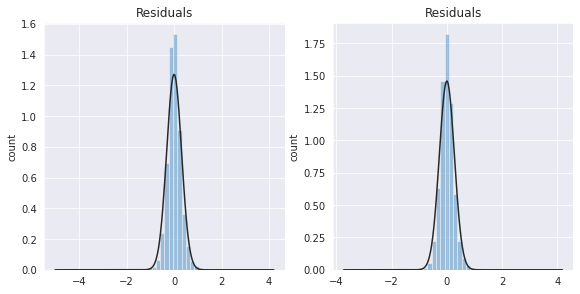

In [190]:
var_hist = [model_rl.resid, model_rl2.resid]
plt.figure(figsize=(25,10))
for i,var in enumerate(var_hist):
    plt.subplot(2,5,i+1)
    sns.distplot(var,fit=stats.norm, kde=False)
    plt.ylabel("count")
    plt.title('Residuals')

Text(0.5, 1.0, "Log-price vs 'start_date_P'")

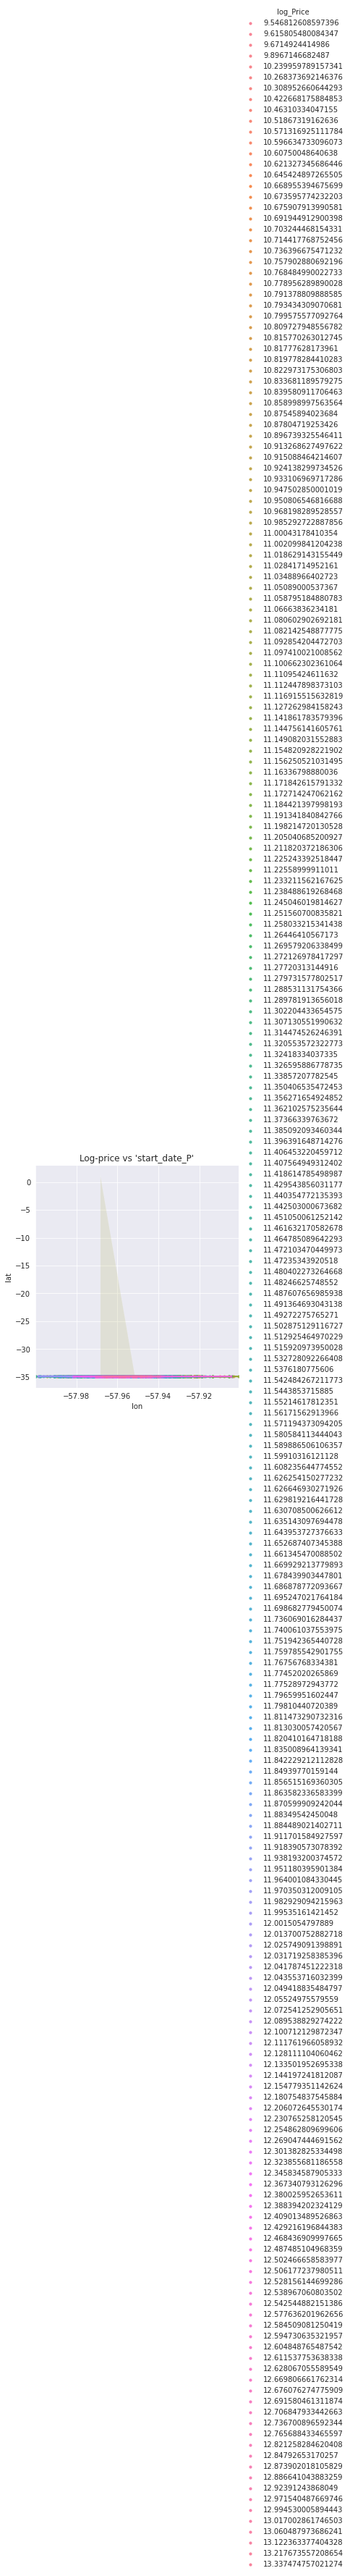

In [46]:
sns.lmplot(x='lon', y='lat', data=df_covar,
             hue="log_Price", height=5, scatter_kws={"s": 10})
plt.title("Log-price vs 'start_date_P'")